Q-11. Given the data of a feature contributing to different classes

* a. Check whether the distribution of all the classes are the same or not.
* b. Check for the equality of variance/
* c. Which amount LDA and QDA would perform better on this data for classification and why.
* d. Check the equality of mean for between all the classes.

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("dataset/Blood_Pressure.csv")
df.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


In [10]:
df.shape

(100, 3)

In [7]:
df.columns

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')

a. Check whether the distribution of all the classes are the same or not.

In [21]:
from scipy.stats import shapiro, ttest_rel

2 Visualize the distribution:

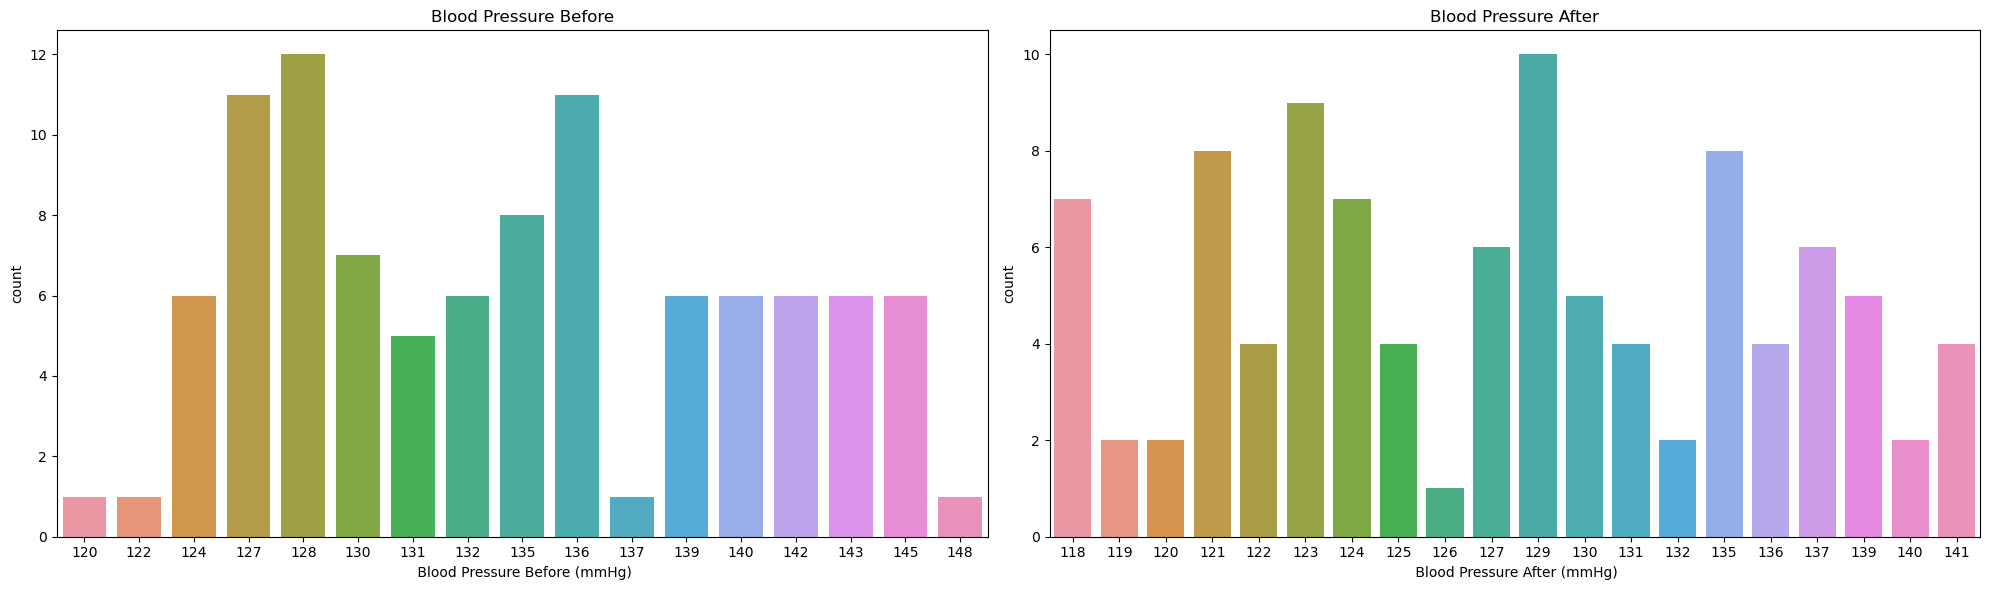

In [32]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x=' Blood Pressure Before (mmHg)')
plt.title("Blood Pressure Before")

plt.subplot(1, 2, 2)
sns.countplot(data=df, x=' Blood Pressure After (mmHg)')
plt.title("Blood Pressure After")



plt.tight_layout()
plt.show()

In [22]:
# Assuming you have a sufficient sample size for each group
statistic_before, p_value_before = shapiro(df[' Blood Pressure Before (mmHg)'])
statistic_after, p_value_after = shapiro(df[' Blood Pressure After (mmHg)'])

print("Shapiro-Wilk Test for Normality:")
print("Blood Pressure Before - Test Statistic:", statistic_before)
print("Blood Pressure Before - p-value:", p_value_before)
print("Blood Pressure After - Test Statistic:", statistic_after)
print("Blood Pressure After - p-value:", p_value_after)


Shapiro-Wilk Test for Normality:
Blood Pressure Before - Test Statistic: 0.9573234915733337
Blood Pressure Before - p-value: 0.002603276167064905
Blood Pressure After - Test Statistic: 0.9400556683540344
Blood Pressure After - p-value: 0.00019430516113061458


Perform a paired t-test:

In [23]:
statistic, p_value = ttest_rel(df[' Blood Pressure Before (mmHg)'],df[' Blood Pressure After (mmHg)'])
print("Paired t-test:")
print("Test Statistic:", statistic)
print("p-value:", p_value)


Paired t-test:
Test Statistic: 38.40500458621546
p-value: 2.817165090364283e-61


In [33]:
from scipy.stats import levene

b. Check for the equality of variance

In [34]:
statistic, p_value = levene(df[' Blood Pressure Before (mmHg)'],df[' Blood Pressure After (mmHg)'])
print("Levene's Test for Equality of Variance:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

Levene's Test for Equality of Variance:
Test Statistic: 0.18038002140150966
p-value: 0.6715080090945376


In [ ]:
# The larger the test statistic suggests a greater difference in variances.dataset has larger variance

c Which amount LDA and QDA would perform better on this data for classification and why.



In [43]:
# To find which would perform better on this data we need to create covariance matrix
# We want to know the cov matrix only for BP before and after therefore extract feature 
df1 = df[[' Blood Pressure Before (mmHg)',' Blood Pressure After (mmHg)']]
cov_matrix = np.cov(df1.T)
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[43.53727273 44.44686869]
 [44.44686869 47.44484848]]


* If the covariance matrix is approximately equal across all classes, LDA may be more suitable.
* If the covariance matrix varies significantly across classes, suggesting different spreads or correlations, QDA may be more appropriate.

Here LDA may be more suitable for this dataset

d Check the equality of mean for between all the classes

In [51]:
import scipy.stats as stats
# Perform the two-sample t-test
statistic, p_value = stats.ttest_ind(df[' Blood Pressure Before (mmHg)'],df[' Blood Pressure After (mmHg)'])

print("t-statistic:", statistic)
print("p-value:", p_value)


t-statistic: 5.818552457956588
p-value: 2.3565868442709904e-08


The p-value is below the significance level(0.05 or 0.001) that indicate there is a significant difference in means between the two features